## **1. Introduction**

``Nama   : Banyu Nurmanjaya``

``Bacth  : HC-K018``

``URL Hungging Face : `` https://huggingface.co/spaces/Banyuuu/weather_prediction

### **1.1. Background**

``Prediksi cuaca yang akurat sangat penting untuk berbagai sektor, termasuk pertanian, penerbangan, perencanaan acara, dan manajemen bencana.`` Memiliki model yang dapat memprediksi cuaca dengan akurat dapat membantu dalam pengambilan keputusan yang lebih baik dan respons yang lebih cepat terhadap kondisi cuaca ekstrem. Dengan meningkatnya ketersediaan data cuaca dan perkembangan teknologi machine learning, ada potensi besar untuk meningkatkan akurasi prediksi cuaca melalui model-model yang lebih canggih

### **1.2. Object**

``(Prediksi Kondisi Cuaca)`` Mengembangkan model prediksi yang dapat memprediksi kondisi cuaca berdasarkan fitur-fitur seperti suhu, kelembaban, kecepatan angin, persentase presipitasi, tekanan atmosfer, indeks UV, visibilitas, penutup awan, musim, dan lokasi

## **2. Dataset**

**Judul     :** ``Weather Type Classification``

**Deskripsi :** Dataset ini dibuat secara sintetis untuk meniru data cuaca untuk tugas klasifikasi. Dataset ini mencakup berbagai fitur yang berhubungan dengan cuaca dan mengkategorikan cuaca ke dalam empat jenis: Hujan, Cerah, Berawan, dan Bersalju. Dataset ini dirancang untuk mempraktikkan algoritma klasifikasi, prapemrosesan data, dan metode deteksi outliers

**Sumber    :** https://www.kaggle.com/datasets/nikhil7280/weather-type-classification/data

![Getting Started](weather.jpeg) 

| Kolom | Deskripsi |
| --- | --- |
| Temperature | Suhu dalam derajat Celcius, mulai dari suhu yang sangat dingin hingga suhu yang sangat panas |
| Humidity | Persentase kelembapan, termasuk nilai di atas 100% untuk memperkenalkan outliears |
| Wind Speed  | Kecepatan angin dalam kilometer per jam, dengan kisaran yang mencakup nilai yang sangat tinggi |
| Precipitation (%) | Persentase curah hujan, termasuk nilai outliears |
| Cloud Cover | Deskripsi tutupan awan |
| Atmospheric Pressure | Tekanan atmosfer dalam hPa, mencakup rentang yang luas |
| UV Index | Indeks UV, mengindikasikan kekuatan radiasi ultraviolet |
| Season | Musim saat data direkam |
| Visibility (km) |  Jarak pandang dalam kilometer, termasuk nilai yang sangat rendah atau sangat tinggi |
| Location | Jenis lokasi tempat data direkam |
| Weather Type | Variabel target untuk klasifikasi, yang menunjukkan jenis cuaca |

## **3. Import Library**

In [247]:
# Library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from feature_engine.outliers import Winsorizer
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import chi2_contingency, spearmanr
import pickle
import warnings

# Mengabaikan semua peringatan
warnings.filterwarnings("ignore")

## **4. Data Loading**

In [248]:
# Membaca file csv dengan variabel data
data = pd.read_csv("weather_classification_data.csv")

In [249]:
# Ubah nama kolom
new_columns = {
    'Temperature': 'temp',
    'Humidity': 'humidity',
    'Wind Speed': 'wind_speed',
    'Precipitation (%)': 'precipitation_pct',
    'Cloud Cover': 'cloud_cover',
    'Atmospheric Pressure': 'atm_pressure',
    'UV Index': 'uv_index',
    'Season': 'season',
    'Visibility (km)': 'visibility_km',
    'Location': 'location',
    'Weather Type': 'weather_type'
}

data = data.rename(columns=new_columns)

Tujuan dari mengubah nama kolom yaitu dengan nama kolom yang ``jelas dan deskriptif membuat data lebih mudah dipahami,`` baik oleh sendiri maupun oleh orang lain yang mungkin bekerja dengan data tersebut

In [250]:
# Menampilkan 10 data pertama
data.head(10)

,temp,humidity,wind_speed,precipitation_pct,cloud_cover,atm_pressure,uv_index,season,visibility_km,location,weather_type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


In [251]:
# Menammpilkan 10 data terakhir
data.tail(10)

,temp,humidity,wind_speed,precipitation_pct,cloud_cover,atm_pressure,uv_index,season,visibility_km,location,weather_type
13190,30.0,24,3.5,16.0,partly cloudy,1017.54,11,Summer,6.5,mountain,Sunny
13191,27.0,48,6.5,14.0,clear,1029.37,8,Summer,8.0,inland,Sunny
13192,31.0,24,8.0,5.0,clear,1029.61,8,Summer,9.0,inland,Sunny
13193,-5.0,65,15.5,50.0,overcast,982.57,1,Winter,5.0,inland,Snowy
13194,29.0,62,13.0,17.0,overcast,1002.81,2,Spring,5.0,coastal,Cloudy
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy
13199,-5.0,38,0.0,92.0,overcast,1015.37,5,Autumn,10.0,mountain,Rainy


In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   temp               13200 non-null  float64
 1   humidity           13200 non-null  int64  
 2   wind_speed         13200 non-null  float64
 3   precipitation_pct  13200 non-null  float64
 4   cloud_cover        13200 non-null  object 
 5   atm_pressure       13200 non-null  float64
 6   uv_index           13200 non-null  int64  
 7   season             13200 non-null  object 
 8   visibility_km      13200 non-null  float64
 9   location           13200 non-null  object 
 10  weather_type       13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


**Informasi:**

* Dataset memiliki ``13200`` baris dan ``11`` kolom
* Setiap kolom dalam dataset ini memiliki ``13200`` non-null values, yang berarti ``tidak ada nilai yang hilang (missing values)`` dalam dataset ini
* kolom ``temp, wind_speed, precipitation_pct, atm_pressure, visibility_km`` memiliki tipe data ``float``
* kolom ``humidity, uv_index memiliki tipe`` data ``integer``
* kolom ``cloud_cover, season, location, weather_type`` memiliki tipe data ``object``
* Memori yang digunakan oleh dataset ini adalah ``1.1+ MB``

## **5. Exploratory Data Analysis (EDA)**

In [253]:
# Menyalin dataframe
data_viz = data.copy()

In [254]:
# Menampikan dataframe yang sudah di salin
data_viz.head()

,temp,humidity,wind_speed,precipitation_pct,cloud_cover,atm_pressure,uv_index,season,visibility_km,location,weather_type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


### **5.1. Average Temperature by Season**

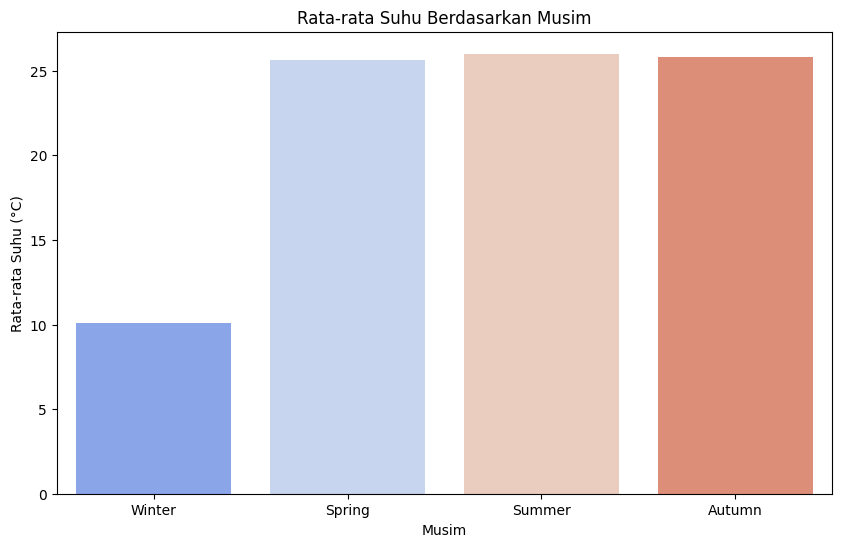

In [255]:
# Rata-rata Suhu Berdasarkan Musim
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='temp', data=data_viz, estimator=np.mean, ci=None, palette='coolwarm')
plt.title('Rata-rata Suhu Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Suhu (°C)')
plt.show()

**Insight:**

* **Tren Musiman:** ``Terdapat pola musiman yang jelas pada data suhu.`` Suhu cenderung paling rendah di musim dingin ``(Winter)`` dan mencapai puncaknya di musim panas ``(Summer).`` Musim semi ``(Spring)`` dan gugur ``(Autumn)`` menunjukkan suhu yang berada di antara musim dingin dan musim panas

* **Perbedaan Suhu yang Signifikan:** ``Terdapat perbedaan suhu yang cukup signifikan antara musim dingin dan musim panas.`` Ini menunjukkan bahwa musim sangat mempengaruhi kondisi suhu di wilayah tersebut

* **Perencanaan:** Informasi ini dapat bermanfaat untuk ``perencanaan berbagai aktivitas,`` seperti pertanian, pariwisata, dan pengelolaan energi. Misalnya, produsen tanaman dapat menyesuaikan jadwal tanam mereka sesuai dengan musim yang paling cocok untuk pertumbuhan tanaman tertentu

### **5.2. Average Temperature per Location**

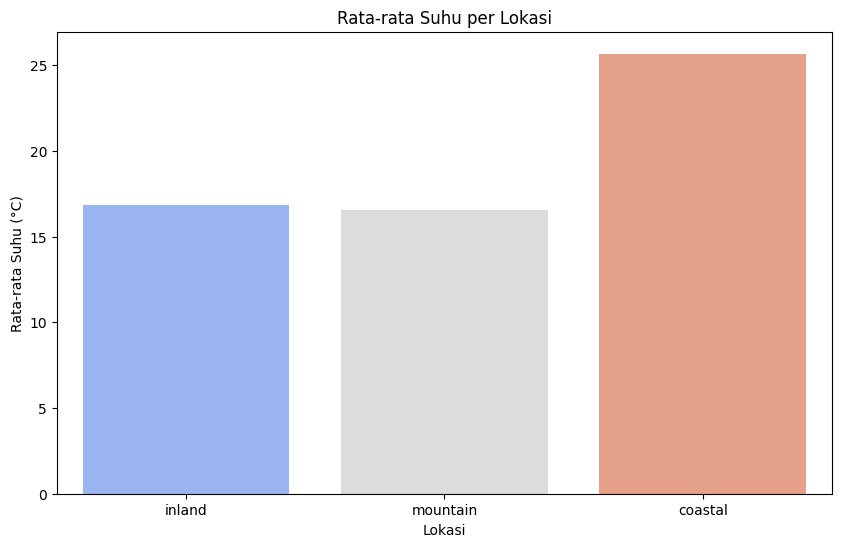

In [256]:
# Bar Plot Rata-rata suhu per lokasi
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='temp', data=data_viz, ci=None, palette='coolwarm')
plt.title('Rata-rata Suhu per Lokasi')
plt.xlabel('Lokasi')
plt.ylabel('Rata-rata Suhu (°C)')
plt.show()

**Insight:**

* **Perbedaan Suhu yang Signifikan:** ``Terdapat perbedaan yang cukup signifikan`` pada suhu rata-rata antara wilayah inland ``(daratan)`` dengan mountain ``(pegunungan)`` atau coastal ``(pantai)``

* **Wilayah Pantai Paling Panas:** ``Wilayah pantai memiliki suhu rata-rata yang paling tinggi`` di antara ketiga lokasi. Hal ini mungkin disebabkan oleh pengaruh laut yang menyerap panas matahari lebih banyak dan kemudian melepaskannya ke udara di sekitarnya

* **Wilayah Pegunungan Paling Dingin:** Sebaliknya, ``wilayah pegunungan memiliki suhu rata-rata yang paling rendah.`` Ketinggian yang lebih tinggi di pegunungan menyebabkan suhu udara cenderung lebih dingin dibandingkan dengan wilayah dataran rendah

* **Wilayah Daratan Dalam (Inland) Suhu Sedang:** ``Wilayah inland memiliki suhu rata-rata yang berada di antara wilayah pantai dan pegunungan.`` Suhu di wilayah ini dipengaruhi oleh berbagai faktor, seperti jarak dari laut, ketinggian, dan vegetasi.
Implikasi dari temuan ini:

* **Iklim Lokal:** Grafik ini juga menunjukkan bahwa ``iklim di suatu wilayah sangat dipengaruhi oleh faktor geografis seperti ketinggian dan jarak dari laut``

### **5.3. Number of Weather Types per Season**

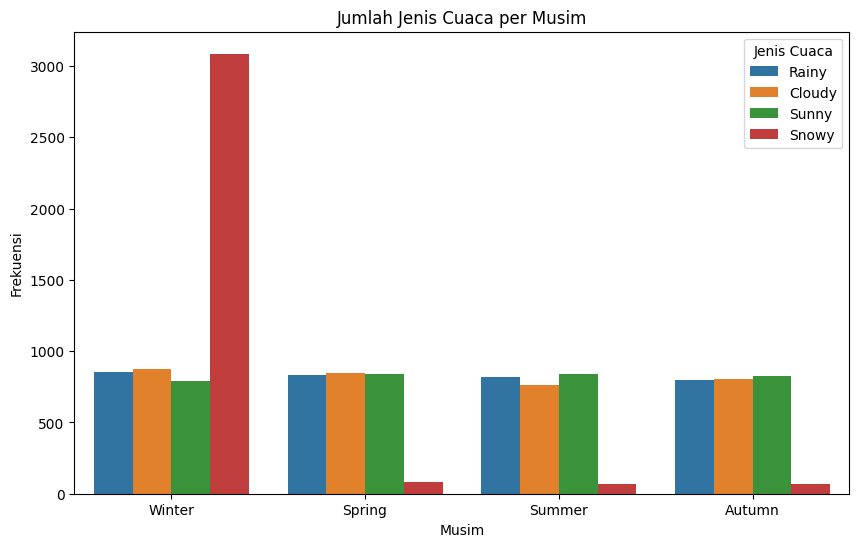

In [257]:
# Bar Plot Jumlah Jenis Cuaca per Musim
plt.figure(figsize=(10, 6))
sns.countplot(x='season', hue='weather_type', data=data_viz)
plt.title('Jumlah Jenis Cuaca per Musim')
plt.xlabel('Musim')
plt.ylabel('Frekuensi')
plt.legend(title='Jenis Cuaca')
plt.show()


**Insight:**

* **Dominasi Cuaca Hujan di Musim Dingin:** ``Musim dingin terlihat memiliki frekuensi cuaca hujan yang paling tinggi dibandingkan musim lainnya.`` Ini merupakan temuan yang umum, mengingat ``musim dingin sering dikaitkan dengan curah hujan yang lebih tinggi``

* **Musim Panas Dominan Cerah:** ``Sebaliknya, musim panas didominasi oleh cuaca cerah.`` Ini menunjukkan bahwa musim panas cenderung memiliki lebih banyak hari dengan sinar matahari dibandingkan musim lainnya

* **Cuaca Berawan:** ``Cuaca berawan cenderung lebih merata di semua musim,`` 

* **Salju di Musim Dingin:** ``Adanya kategori "Snowy" mengindikasikan bahwa data ini kemungkinan berasal dari wilayah dengan iklim yang cukup dingin`` sehingga mengalami musim salju. Frekuensi salju tertinggi pastinya terjadi di musim dingin

### **5.4. Average Humidity per Weather Type**

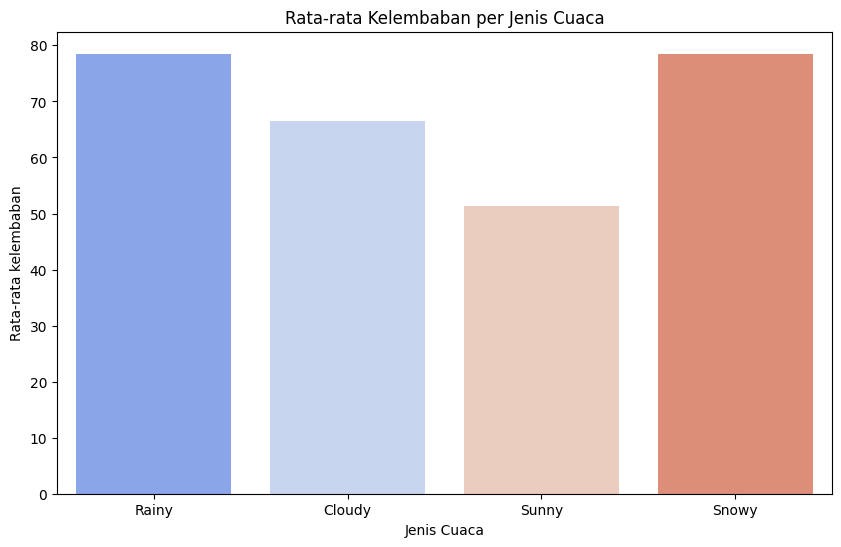

In [258]:
# Bar Plot Rata-rata kelembaban per Jenis Cuaca
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_type', y='humidity', data=data_viz, ci=None, palette='coolwarm')
plt.title('Rata-rata Kelembaban per Jenis Cuaca')
plt.xlabel('Jenis Cuaca')
plt.ylabel('Rata-rata kelembaban')
plt.show()

**Insight:**

* **Cuaca Hujan Paling Lembap:** ``Cuaca hujan memiliki tingkat kelembaban rata-rata yang paling tinggi`` di antara semua jenis cuaca yang ditampilkan, karena proses penguapan air selama hujan meningkatkan kadar uap air di udara, sehingga meningkatkan kelembaban

* **Cuaca Berawan Cukup Lembap:** ``Cuaca berawan juga menunjukkan tingkat kelembaban yang cukup tinggi,`` meskipun tidak setinggi cuaca hujan, hal ini menunjukkan bahwa adanya awan di langit dapat meningkatkan kelembaban udara

* **Cuaca Cerah Paling Kering:** Sebaliknya, ``cuaca cerah memiliki tingkat kelembaban yang paling rendah,`` ini menunjukkan bahwa pada hari-hari cerah, tingkat penguapan air lebih rendah dan udara cenderung lebih kering

* **Cuaca Bersalju Sangat Lembap:** ``Cuaca bersalju menunjukkan tingkat kelembaban yang sangat tinggi, bahkan lebih tinggi dari cuaca hujan.`` Hal ini disebabkan oleh adanya uap air yang terkandung dalam salju yang mencair

### **5.5. Relationship between Temperature and Humidity**

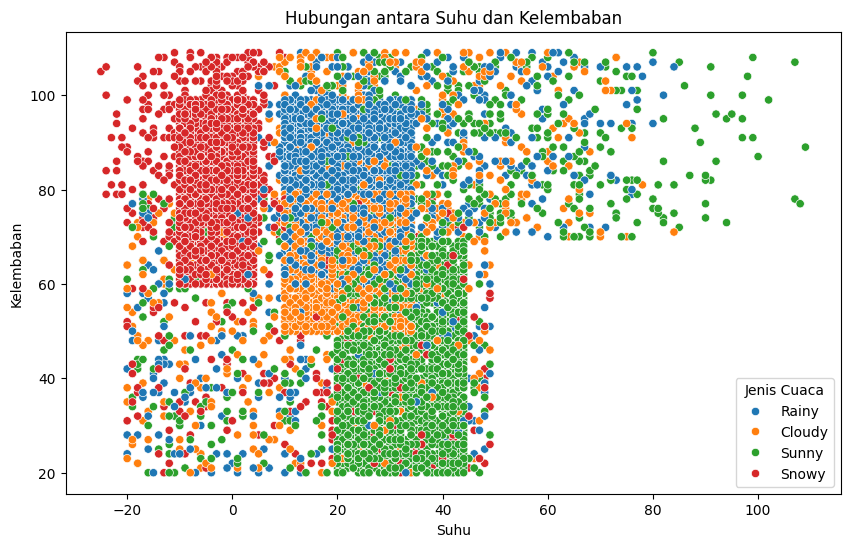

In [259]:
# Scatter plot Hubungan antara suhu dan kelembaban
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='humidity', hue='weather_type', data=data_viz)
plt.title('Hubungan antara Suhu dan Kelembaban')
plt.xlabel('Suhu')
plt.ylabel('Kelembaban')
plt.legend(title='Jenis Cuaca')
plt.show()

**Insight:**

* **Tren Umum:** Secara umum, ``terdapat korelasi positif antara suhu dan kelembaban.`` Artinya, semakin tinggi suhu, maka semakin tinggi pula kelembaban. Ini masuk akal karena udara hangat dapat menampung lebih banyak uap air dibandingkan udara dingin

* **Cuaca Hujan:** Titik-titik data untuk ``cuaca hujan cenderung tersebar di area dengan kelembaban tinggi`` dan rentang suhu yang lebih luas. Ini menunjukkan bahwa cuaca hujan dapat terjadi pada berbagai suhu, tetapi selalu diikuti dengan kelembaban yang tinggi

* **Cuaca Berawan:** ``Cuaca berawan juga cenderung memiliki kelembaban yang cukup tinggi,`` terutama pada suhu yang lebih rendah. Awan terbentuk dari uap air yang mengembun, sehingga cuaca berawan seringkali dikaitkan dengan kelembaban yang tinggi

* **Cuaca Cerah:** Sebaliknya, ``cuaca cerah cenderung memiliki kelembaban yang lebih rendah`` dan tersebar di area dengan suhu yang lebih tinggi. Ini menunjukkan bahwa pada cuaca cerah, penguapan air lebih tinggi, namun udara tidak terlalu jenuh dengan uap air

* **Cuaca Bersalju:** ``Cuaca bersalju memiliki karakteristik yang unik. Meskipun salju mengandung banyak air, namun suhu pada kondisi ini cenderung sangat rendah.`` Oleh karena itu, titik-titik data untuk cuaca bersalju cenderung berada di sudut kiri bawah grafik, di area dengan suhu rendah dan kelembaban yang cukup tinggi

## **6. Feature Engineering** 

In [260]:
# Menyalin dataframe
df = data.copy()

Ketika kita membuat salinan DataFrame, perubahan yang kita lakukan pada salinan tersebut tidak akan mempengaruhi DataFrame asli. ``Ini sangat berguna ketika kita ingin melakukan eksperimen atau manipulasi data tanpa risiko merusak data asli``, ataupun Kita bisa membuat beberapa salinan DataFrame dengan modifikasi yang berbeda-beda. Hal ini berguna untuk ``melakukan analisis perbandingan atau membuat visualisasi yang berbeda``

In [261]:
df.weather_type.value_counts()

weather_type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

Berdasarkan output yang di atas, ``data tersebut dapat dikatakan seimbang``

Hal ini ditunjukkan oleh ``jumlah yang sama untuk setiap kategori cuaca (Rainy, Cloudy, Sunny, Snowy), yaitu 3300 untuk masing-masing kategori``

### **6.1. Check Duplicate Data & Missing Value**

In [262]:
# Memeriksa jumlah dari data duplikat maupun nilai yang hilang
print("Jumlah Data Duplikat: ", df.duplicated().sum())
print(" ")
print("Jumlah Missing Value: ", df.isnull().sum())

Jumlah Data Duplikat:  0
 
Jumlah Missing Value:  temp                 0
humidity             0
wind_speed           0
precipitation_pct    0
cloud_cover          0
atm_pressure         0
uv_index             0
season               0
visibility_km        0
location             0
weather_type         0
dtype: int64


**Informasi:**

``Tidak terdapat data duplikat maupun keberadaan missing value``

### **6.2. Check Cardinality**

In [263]:
# Set pengaturan tampilan pandas
pd.set_option('display.max_colwidth', None)

pd.set_option('display.max_rows', None)

# Membuat DataFrame untuk menghitung jumlah unique dan nilai unique
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

unique_val_df = pd.DataFrame(columns=['Nama Kolom', 'Jumlah Unique', 'Unique'],
                     data=listItem)

unique_val_df

,Nama Kolom,Jumlah Unique,Unique
0,temp,126,"[14.0, 39.0, 30.0, 38.0, 27.0, 32.0, -2.0, 3.0, 28.0, 35.0, 12.0, -10.0, 24.0, 10.0, 33.0, 43.0, 13.0, -7.0, 26.0, 4.0, 17.0, 40.0, 2.0, 15.0, 29.0, 11.0, -9.0, 36.0, 42.0, 21.0, 22.0, 25.0, -4.0, -1.0, -5.0, 41.0, 31.0, 16.0, 34.0, 49.0, 19.0, 23.0, 20.0, -3.0, 18.0, 1.0, 0.0, 46.0, 44.0, -13.0, -6.0, 78.0, 63.0, 73.0, 8.0, -12.0, -24.0, -8.0, 60.0, 48.0, 5.0, 51.0, -14.0, 50.0, 37.0, 54.0, 47.0, 70.0, 9.0, 66.0, -16.0, -15.0, 59.0, 80.0, -19.0, 52.0, 45.0, 6.0, -18.0, -11.0, 74.0, 76.0, 55.0, -20.0, 57.0, 91.0, 82.0, -17.0, 61.0, 7.0, 53.0, 65.0, 77.0, 67.0, 64.0, 58.0, 68.0, 72.0, 62.0, 71.0, ...]"
1,humidity,90,"[73, 96, 64, 83, 74, 55, 97, 85, 45, 43, 59, 87, 21, 50, 27, 51, 46, 102, 67, 88, 36, 79, 72, 57, 61, 70, 95, 69, 90, 105, 49, 37, 22, 54, 66, 25, 91, 98, 94, 41, 84, 63, 75, 52, 89, 47, 81, 62, 31, 68, 35, 78, 56, 93, 44, 38, 24, 82, 65, 80, 39, 48, 60, 29, 99, 92, 76, 77, 86, 32, 58, 42, 30, 100, 33, 71, 107, 108, 26, 106, 28, 109, 101, 34, 103, 40, 23, 104, 53, 20]"
2,wind_speed,97,"[9.5, 8.5, 7.0, 1.5, 17.0, 3.5, 8.0, 6.0, 2.0, 10.5, 15.0, 6.5, 0.5, 12.0, 12.5, 7.5, 13.5, 1.0, 4.0, 16.0, 16.5, 2.5, 23.0, 3.0, 10.0, 25.5, 19.0, 11.5, 0.0, 9.0, 18.5, 11.0, 20.0, 14.0, 5.5, 13.0, 46.5, 5.0, 18.0, 28.5, 14.5, 4.5, 15.5, 28.0, 19.5, 21.5, 34.0, 17.5, 47.0, 34.5, 35.5, 23.5, 42.5, 33.0, 31.5, 26.0, 22.0, 36.5, 27.5, 20.5, 35.0, 30.0, 26.5, 21.0, 32.5, 32.0, 24.0, 27.0, 22.5, 31.0, 30.5, 24.5, 29.5, 37.0, 44.5, 41.0, 41.5, 40.5, 37.5, 46.0, 25.0, 39.0, 29.0, 45.0, 43.5, 45.5, 36.0, 38.0, 44.0, 38.5, 33.5, 40.0, 42.0, 47.5, 39.5, 43.0, 48.5]"
3,precipitation_pct,110,"[82.0, 71.0, 16.0, 66.0, 26.0, 86.0, 96.0, 107.0, 25.0, 67.0, 8.0, 46.0, 13.0, 27.0, 15.0, 72.0, 75.0, 98.0, 18.0, 29.0, 101.0, 85.0, 62.0, 12.0, 3.0, 54.0, 97.0, 63.0, 56.0, 91.0, 6.0, 76.0, 109.0, 58.0, 37.0, 9.0, 0.0, 39.0, 11.0, 14.0, 88.0, 78.0, 55.0, 90.0, 4.0, 69.0, 68.0, 32.0, 87.0, 17.0, 89.0, 57.0, 41.0, 84.0, 83.0, 47.0, 99.0, 92.0, 19.0, 60.0, 65.0, 5.0, 43.0, 2.0, 59.0, 79.0, 94.0, 42.0, 53.0, 73.0, 81.0, 52.0, 36.0, 45.0, 21.0, 22.0, 40.0, 50.0, 51.0, 10.0, 35.0, 95.0, 103.0, 7.0, 74.0, 48.0, 61.0, 64.0, 31.0, 106.0, 93.0, 24.0, 1.0, 80.0, 23.0, 70.0, 20.0, 104.0, 77.0, 30.0, ...]"
4,cloud_cover,4,"[partly cloudy, clear, overcast, cloudy]"
5,atm_pressure,5456,"[1010.82, 1011.43, 1018.72, 1026.25, 990.67, 1010.03, 990.87, 984.46, 999.44, 1012.13, 879.88, 1029.16, 1016.08, 986.19, 1018.88, 1000.44, 1016.38, 1009.18, 1025.8, 1012.25, 991.53, 980.31, 1014.29, 1012.02, 1017.94, 982.53, 1010.16, 1020.73, 1018.15, 1007.75, 991.07, 995.74, 984.63, 1009.36, 1012.09, 1026.81, 996.17, 991.68, 1132.2, 1017.27, 1013.99, 1028.63, 1018.86, 1028.55, 1019.41, 1016.5, 1014.34, 1010.34, 1019.42, 981.26, 1017.49, 1014.49, 990.72, 984.11, 991.65, 997.97, 1017.89, 1018.56, 1074.07, 996.12, 1011.96, 992.45, 1009.01, 996.85, 1007.84, 995.4, 1017.16, 1025.22, 993.14, 1026.15, 983.36, 1017.74, 1063.39, 1013.61, 1022.53, 1027.53, 1018.98, 992.83, 1009.48, 1006.67, 1017.82, 1029.09, 983.83, 1019.92, 999.46, 1160.48, 999.99, 1022.48, 1014.4, 995.63, 1008.0, 1009.12, 1018.44, 853.01, 824.71, 1026.94, 1000.74, 1023.62, 981.02, 1013.85, ...]"
6,uv_index,15,"[2, 7, 5, 1, 0, 8, 11, 3, 9, 4, 13, 10, 14, 6, 12]"
7,season,4,"[Winter, Spring, Summer, Autumn]"
8,visibility_km,41,"[3.5, 10.0, 5.5, 1.0, 2.5, 5.0, 4.0, 7.5, 1.5, 8.5, 6.0, 8.0, 3.0, 9.5, 9.0, 4.5, 2.0, 16.5, 12.5, 6.5, 7.0, 0.0, 17.5, 17.0, 13.0, 11.0, 0.5, 16.0, 18.0, 10.5, 11.5, 19.0, 18.5, 13.5, 15.5, 15.0, 14.5, 14.0, 12.0, 20.0, 19.5]"
9,location,3,"[inland, mountain, coastal]"


| Kolom | Tipe Cardinalitas |
| --- | --- |
| temp | Numerikal |
| umidity | Numerikal |
| wind_speed  | Numerikal |
| precipitation_pct | Numerikal |
| cloud_cover | kategorikal |
| atm_pressure | Numerikal |
| uv_index | Numerikal |
| season | kategorikal |
| visibility_km |  Numerikal |
| location | kategorikal |
| weather_type | kategorikal |

### **6.3. Split Features, Target, Train-Test**

In [264]:
# Buat data inference terpisah
data_inf = df.sample(3, random_state=30)

# Hapus data inference dari data utama
df.drop(data_inf.index, inplace=True)

# Reset indeks data utama dan data inference
df.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

# Hapus target dari data inference
data_inf.drop(['weather_type'], axis=1, inplace=True)


In [265]:

# Split dataframe ke X dan y
X = df.drop('weather_type', axis=1)
y = df['weather_type']

# Tampilkan bentuk data yang sudah dipisah
print('fitur:', X.shape)
print('target:', y.shape)

fitur: (13197, 10)
target: (13197,)


* **Jumlah data:** Terdapat ``13,197 data poin`` dalam dataset ini

* **Fitur:** Setiap data poin memiliki ``10 fitur`` yang mendeskripsikannya, ini menunjukkan bahwa setiap data poin ``diwakili oleh 10 nilai`` yang mungkin terkait dengan karakteristik atau pengukurannya

In [266]:
# Splitting X dan y menjadi train dan test dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4, stratify=y)


### **6.4. Handling Outlier**

In [267]:
# Membuat function untuk menemukan outlier boundaries
def find_boundaries(dataframe):

    # Membuat dataframe dan empty lists
    result = pd.DataFrame()
    columns_name = []
    skew = []
    upper = []
    lower = []
    outlier_tf = []
    type = []

    # Memilih hanya numeric columns
    num_columns = dataframe.select_dtypes(include=['int64','float64'])
    

    # looping columns
    for column in num_columns:
        columns_name.append(column)

        # Menghitung skewness
        skewness = dataframe[column].skew()
        skew.append(skewness)

        # Memisahkan tipe skewness 
        if -0.5 <= skewness <= 0.5:
            # Menghitung normal type boundaries
            upper_boundary = dataframe[column].mean() + (3 * dataframe[column].std())
            lower_boundary = dataframe[column].mean() - (3 * dataframe[column].std())
            type.append("normal")
    
        elif -1 <= skewness <= -0.5 or 0.5 <= skewness <= 1:
            # Menghitung moderate skew type boundaries
            IQR = dataframe[column].quantile(0.75) - dataframe[column].quantile(0.25)
            lower_boundary = dataframe[column].quantile(0.25) - (IQR * 1.5)
            upper_boundary = dataframe[column].quantile(0.75) + (IQR * 1.5)
            type.append("moderate")

        elif -1 >= skewness or skewness >= 1:
            # Menghitung extreme skew type boundaries
            IQR = dataframe[column].quantile(0.75) - dataframe[column].quantile(0.25)
            lower_boundary = dataframe[column].quantile(0.25) - (IQR * 3)
            upper_boundary = dataframe[column].quantile(0.75) + (IQR * 3)
            type.append("extreme")

        # Masukkan data ke dalam lists
        upper.append(upper_boundary)
        lower.append(lower_boundary)

        # outliers
        outliers = (dataframe[column] < lower_boundary) | (dataframe[column] > upper_boundary)
        outlier_tf.append(any(outliers))

    # Menambahkan ke dalam dataframe
    result['columns'] = columns_name
    result['skewness'] = skew
    result['upper_value'] = upper
    result['lower_value'] = lower
    result['outliers'] = outlier_tf
    result['skew_type'] = type

    return result

In [268]:
# memilih kolom numeric 
num_columns = X_train.select_dtypes(include=['int64','float64'])

In [269]:
# menggunakan function untuk menemukan boundaries X_train
dfbound = find_boundaries(num_columns)
dfbound

,columns,skewness,upper_value,lower_value,outliers,skew_type
0,temp,0.220222,71.775396,-33.204215,True,normal
1,humidity,-0.407702,129.265068,8.239100,False,normal
2,wind_speed,1.391083,39.000000,-20.500000,True,extreme
3,precipitation_pct,-0.155232,150.049268,-42.354778,False,normal
4,atm_pressure,-0.543131,1050.015000,961.255000,True,moderate
5,uv_index,0.900044,16.000000,-8.000000,False,moderate
6,visibility_km,1.232703,21.000000,-10.500000,False,extreme


* **Kolom yang Memiliki Outliers:** ``temp, wind_speed, atm_pressure``

* **atm_pressure, uv_index:** ``memiliki tipe skew moderate``

* **temp, humidity, precipitation_pct:** ``memiliki tipe skew normal``

* **wind_speed, visibility_km:** ``memiliki tipe skew extreme``

#### **6.4.1. Capping**

In [270]:
# Menemukan outliers untuk normal skew
outlier_column = dfbound[(dfbound['outliers']==True)&(dfbound['skew_type']=='normal')]['columns'].tolist()
outlier_column

['temp']

In [271]:
# Menemukan outliers untuk skew kolom
outlier_column_skew = dfbound[(dfbound['outliers']==True)&(dfbound['skew_type']!='normal')]['columns'].tolist()
outlier_column_skew

['wind_speed', 'atm_pressure']

In [272]:
#capping skewed data
winsoriser_skew = Winsorizer(capping_method='iqr',
                            tail='both',
                            fold=1.5,
                            variables=outlier_column_skew)

X_train_capped = winsoriser_skew.fit_transform(X_train)
X_test_capped = winsoriser_skew.transform(X_test)


Winsorizer digunakan dalam preprocessing data untuk ``mengatasi masalah outliers atau nilai ekstrem`` pada data yang memiliki distribusi skewed 

In [273]:
# Function untuk histogram and boxplot
def diagnostic_plots(df, variable):
    # definisi figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

temp - Before Capping


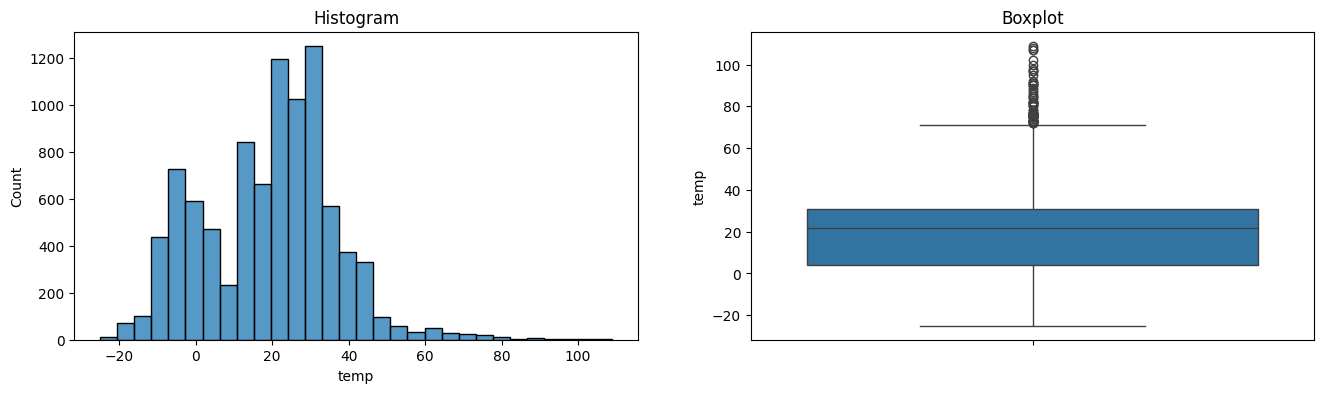


temp - After Capping


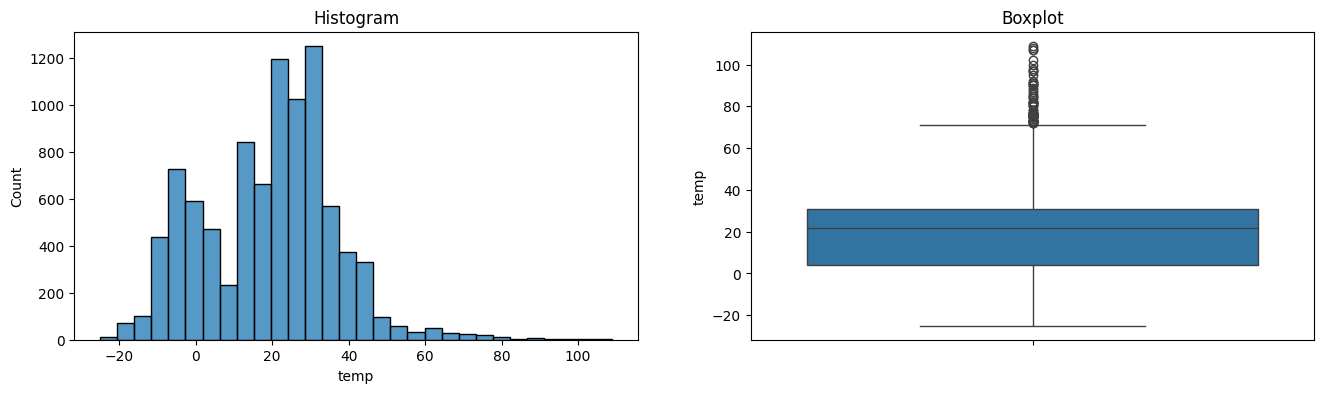

wind_speed - Before Capping


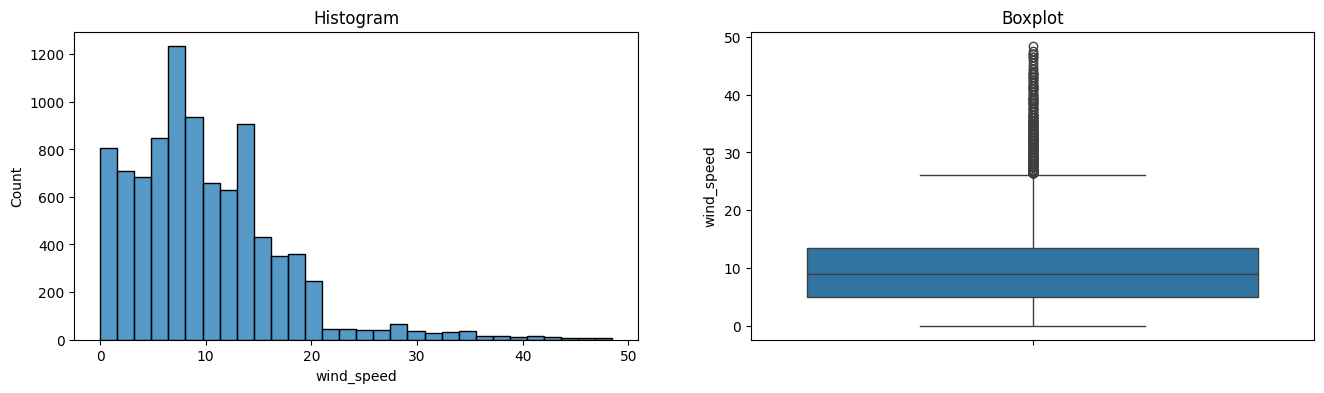


wind_speed - After Capping


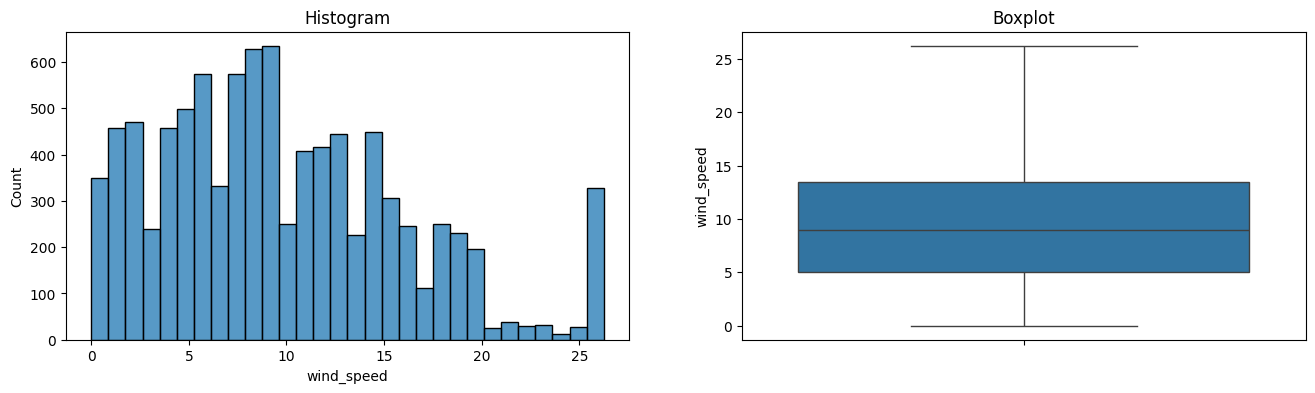

atm_pressure - Before Capping


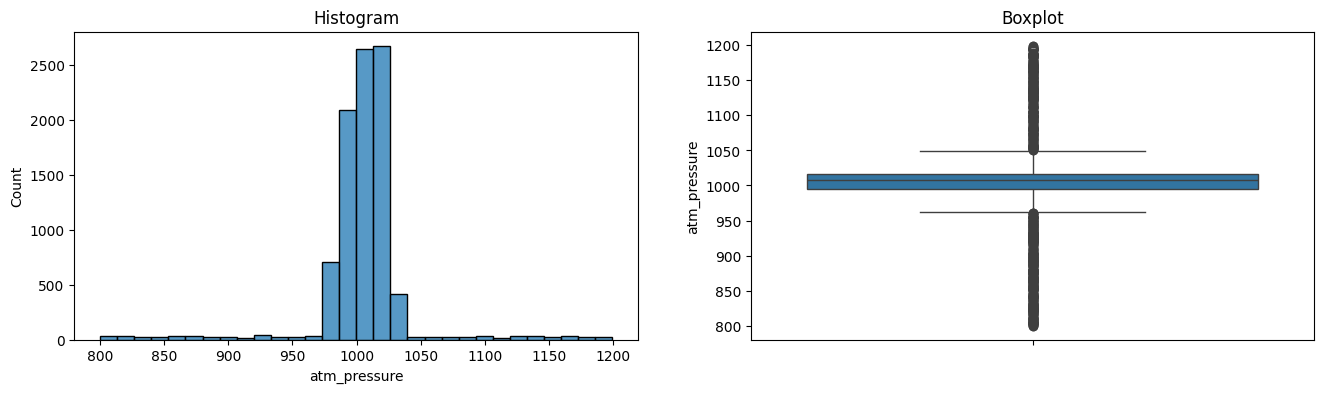


atm_pressure - After Capping


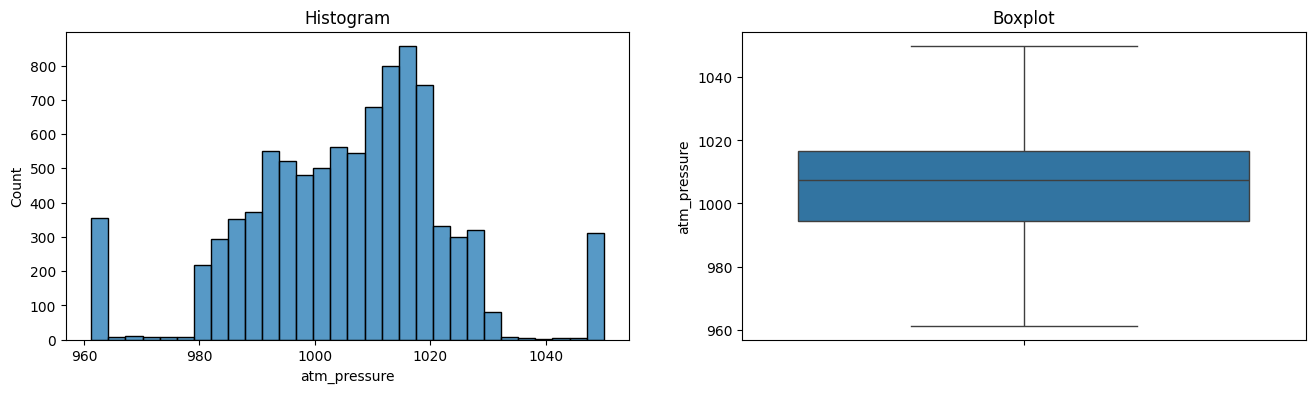

In [274]:
#loop outlier kolom
for col in outlier_column+outlier_column_skew:
    print(f'{col} - Before Capping')
    diagnostic_plots(X_train, col)

    print(f'\n{col} - After Capping')
    diagnostic_plots(X_train_capped, col)

**Insight:**

* **Proses capping efektif mengurangi variabilitas:** Histogram dan boxplot setelah capping menunjukkan ``distribusi data yang lebih terpusat dan sempit.``Ini berarti, nilai-nilai ekstrem (outliers) yang sebelumnya ada telah berhasil ditekan

* **Data menjadi lebih stabil:** Dengan variabilitas yang lebih rendah, ``data menjadi lebih stabil dan konsisten.`` Ini dapat memudahkan dalam melakukan analisis lebih lanjut atau membangun model


### **6.5. Feature Selection**

In [275]:
# Menampilkan semua kolom
df.columns

Index(['temp', 'humidity', 'wind_speed', 'precipitation_pct', 'cloud_cover',
       'atm_pressure', 'uv_index', 'season', 'visibility_km', 'location',
       'weather_type'],
      dtype='object')

In [276]:
# Tentukan kolom nominal, dan numerikal
nominals = ['cloud_cover', 'season', 'location']
num_col = ['temp', 'humidity', 'wind_speed', 'precipitation_pct', 'atm_pressure', 'uv_index', 'visibility_km']

#### **6.5.1. Nominal Selection**

In [277]:
# Set tingkat signifikansi (alpha)
alpha = 0.05

# Inisialisasi dataframe hasil korelasi untuk kolom kategorikal
correlation_df_nominal = pd.DataFrame(columns=['categorical_column', 'chi2-statistic', 'p-value', 'is_correlated'])

# Lakukan uji Chi-squared untuk setiap kolom kategorikal
for cat_column in nominals:
    contingency_table = pd.crosstab(X_train[cat_column], y_train)
    chi2, p, _, _ = chi2_contingency(contingency_table)
    
    is_correlated = 'Yes' if p < alpha else 'No'
    
    correlation_df_nominal = pd.concat([
        correlation_df_nominal,
        pd.DataFrame({'categorical_column': [cat_column], 'chi2-statistic': [chi2], 'p-value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)


correlation_df_nominal

,categorical_column,chi2-statistic,p-value,is_correlated
0,cloud_cover,6580.976871,0.000000e+00,Yes
1,season,3303.317490,0.000000e+00,Yes
2,location,847.953165,6.683626e-180,Yes


*  Uji Chi-Square dirancang khusus untuk ``menganalisis data kategorikal.`` Dalam konteks ini, baik ``cat_column`` maupun ``y_train`` adalah variabel kategorikal, sehingga ``uji Chi-Square merupakan pilihan yang tepat``

* Semua kolom memiliki ``korelasi pada target``

#### **6.5.2. Numerical Selection**

In [278]:
# Inisialisasi dataframe hasil korelasi untuk kolom numerikal
correlation_df_num = pd.DataFrame(columns=['numerical_column', 'correlation-statistic', 'p-value', 'is_correlated'])

# Lakukan uji korelasi untuk setiap kolom numerikal
for cont_column in num_col:
    corr, p = spearmanr(X_train[cont_column], y_train)
    
    is_correlated = 'Yes' if p < alpha else 'No'
    
    correlation_df_num = pd.concat([
        correlation_df_num,
        pd.DataFrame({'numerical_column': [cont_column], 'correlation-statistic': [corr], 'p-value': [p], 'is_correlated': [is_correlated]})
    ], ignore_index=True)


correlation_df_num

,numerical_column,correlation-statistic,p-value,is_correlated
0,temp,0.059534,1.028079e-08,Yes
1,humidity,-0.207978,8.445917e-91,Yes
2,wind_speed,-0.203952,2.560847e-87,Yes
3,precipitation_pct,-0.163341,2.981550e-56,Yes
4,atm_pressure,0.136742,8.493903e-40,Yes
5,uv_index,0.260713,2.199100e-143,Yes
6,visibility_km,0.048372,3.302470e-06,Yes


* ``Spearmanr tidak memerlukan asumsi normalitas`` data seperti metode korelasi Pearson. Ini membuatnya lebih ``robust terhadap outliers dan distribusi data yang tidak normal``

* Semua kolom ``memiliki korelasi terhadap target``

#### **6.5.3. Selected Features**

**Fitur-fitur yang dipilih ialah:**

* **Nominal:** ``cloud_cover, location, season``

* **Numerikal:** ``temp, humidity, wind_speed, precipitation_pct, atm_pressure, uv_index, visibility_km``

### **6.6. Feature Encoding and Scaling**

In [279]:
# Memilih kolom dari numerikal and nominal
nominals = ['cloud_cover', 'season', 'location']
num_col = ['temp', 'humidity', 'wind_speed', 'precipitation_pct', 'atm_pressure', 'uv_index', 'visibility_km']

In [280]:
# Pisahkan data latih dan uji ke dalam kolom numerikal dan nominal
X_train_cat_ordinal = X_train[nominals]
X_train_num = X_train[num_col]

X_test_cat_ordinal = X_test[nominals]
X_test_num = X_test[num_col]

Kolom numerik dan nominal ``memerlukan teknik preprocessing yang berbeda.`` Misalnya, kolom numerik mungkin perlu dinormalisasi atau distandarisasi, sedangkan kolom nominal mungkin perlu diubah menjadi representasi numerik dengan itu tujuan utama dari pemisahan data latih dan uji ke dalam kolom numerik dan nominal adalah ``untuk mempersiapkan data agar sesuai dengan algoritma machine learning yang berbeda``

In [281]:

# Pipeline untuk scaling kolom numerik
num_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

# Pipeline untuk encoding kolom nominal
cat_pipeline = Pipeline([
    ('encoder', OrdinalEncoder())
])

# Pipeline preprocessing untuk menggabungkan dan mentransformasikan data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_col),
        ('cat', OneHotEncoder(handle_unknown='ignore'), nominals)
    ])

# Pipeline Logistic Regression dengan PCA
pipe_logreg = Pipeline([
    ("preprocess", preprocessor),
    ("pca", PCA(n_components=0.95)),
    ("logreg", LogisticRegression(max_iter=1000000))
])

# Pipeline SVM dengan PCA
pipe_svm = Pipeline([
    ("preprocess", preprocessor),
    ("pca", PCA(n_components=0.95)),
    ("svm", SVC())
])

# Pipeline Decision Tree dengan PCA
pipe_dt = Pipeline([
    ("preprocess", preprocessor),
    ("pca", PCA(n_components=0.95)),
    ("dt", DecisionTreeClassifier())
])

# Pipeline Random Forest dengan PCA
pipe_rf = Pipeline([
    ("preprocess", preprocessor),
    ("pca", PCA(n_components=0.95)),
    ("rf", RandomForestClassifier())
])

# Pipeline KNN dengan PCA
pipe_knn = Pipeline([
    ("preprocess", preprocessor),
    ("pca", PCA(n_components=0.95)),
    ("knn", KNeighborsClassifier())
])

# Pipeline Naive Bayes dengan PCA
pipe_nb = Pipeline([
    ("preprocess", preprocessor),
    ("pca", PCA(n_components=0.95)),
    ("nb", GaussianNB())
])

# Pipeline AdaBoost dengan PCA
pipe_ada = Pipeline([
    ("preprocess", preprocessor),
    ("pca", PCA(n_components=0.95)),
    ("ada", AdaBoostClassifier())
])

display(pipe_logreg)
display(pipe_svm)
display(pipe_dt)
display(pipe_rf)
display(pipe_knn)
display(pipe_nb)
display(pipe_ada)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['temp', 'humidity',
                                                   'wind_speed',
                                                   'precipitation_pct',
                                                   'atm_pressure', 'uv_index',
                                                   'visibility_km']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cloud_cover', 'season',
                                                   'location'])])),
                ('pca', PCA(n_components=0.95)),
                ('logreg', LogisticRegression(max_iter=1000000))])

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['temp', 'humidity',
                                                   'wind_speed',
                                                   'precipitation_pct',
                                                   'atm_pressure', 'uv_index',
                                                   'visibility_km']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cloud_cover', 'season',
                                                   'location'])])),
                ('pca', PCA(n_components=0.95)), ('svm', SVC())])

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['temp', 'humidity',
                                                   'wind_speed',
                                                   'precipitation_pct',
                                                   'atm_pressure', 'uv_index',
                                                   'visibility_km']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cloud_cover', 'season',
                                                   'location'])])),
                ('pca', PCA(n_components=0.95)),
                ('dt', DecisionTreeClassifier())])

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['temp', 'humidity',
                                                   'wind_speed',
                                                   'precipitation_pct',
                                                   'atm_pressure', 'uv_index',
                                                   'visibility_km']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cloud_cover', 'season',
                                                   'location'])])),
                ('pca', PCA(n_components=0.95)),
                ('rf', RandomForestClassifier())])

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['temp', 'humidity',
                                                   'wind_speed',
                                                   'precipitation_pct',
                                                   'atm_pressure', 'uv_index',
                                                   'visibility_km']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cloud_cover', 'season',
                                                   'location'])])),
                ('pca', PCA(n_components=0.95)),
                ('knn', KNeighborsClassifier())])

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['temp', 'humidity',
                                                   'wind_speed',
                                                   'precipitation_pct',
                                                   'atm_pressure', 'uv_index',
                                                   'visibility_km']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cloud_cover', 'season',
                                                   'location'])])),
                ('pca', PCA(n_components=0.95)), ('nb', GaussianNB())])

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['temp', 'humidity',
                                                   'wind_speed',
                                                   'precipitation_pct',
                                                   'atm_pressure', 'uv_index',
                                                   'visibility_km']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cloud_cover', 'season',
                                                   'location'])])),
                ('pca', PCA(n_components=0.95)),
                ('ada', AdaBoostClassifier())])

Code di atas memberikan atau menunjukkan ``proses pembentukan beberapa pipeline untuk model machine learning.`` Pipeline ini dirancang untuk melakukan preprocessing data, reduksi dimensi, dan akhirnya menerapkan berbagai algoritma klasifikasi

## **7. Model Training**

In [282]:
# Inisialisasi Stratified K-Fold
skfold = StratifiedKFold(n_splits=5)

# Lakukan cross-validation untuk setiap model
cv_svm_model = cross_val_score(pipe_svm, X_train, y_train, cv=skfold, scoring="accuracy")
cv_log_model = cross_val_score(pipe_logreg, X_train, y_train, cv=skfold, scoring="accuracy")
cv_dt_model = cross_val_score(pipe_dt, X_train, y_train, cv=skfold, scoring="accuracy")
cv_rf_model = cross_val_score(pipe_rf, X_train, y_train, cv=skfold, scoring="accuracy")
cv_knn_model = cross_val_score(pipe_knn, X_train, y_train, cv=skfold, scoring="accuracy")
cv_nb_model = cross_val_score(pipe_nb, X_train, y_train, cv=skfold, scoring="accuracy")
cv_ada_model = cross_val_score(pipe_ada, X_train, y_train, cv=skfold, scoring="accuracy")

# Inisialisasi variabel untuk menyimpan hasil terbaik
name_model = []
cv_scores = 0

# Evaluasi hasil cross-validation
for cv, name in zip(
    [cv_log_model, cv_svm_model, cv_dt_model, cv_rf_model, cv_knn_model, cv_nb_model, cv_ada_model],
    ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'KNN', 'Naive Bayes', 'AdaBoost']
):
    print(name)
    print('Accuracy - All - Cross Validation  : ', cv)
    print('Accuracy - Mean - Cross Validation : ', cv.mean())
    print('Accuracy - Std - Cross Validation  : ', cv.std())
    print('Accuracy - Range of Test-Set       : ', (cv.mean() - cv.std()) , '-', (cv.mean() + cv.std()))
    print('-' * 50)
    if cv.mean() > cv_scores:
        cv_scores = cv.mean()
        name_model = name

print('Best model:', name_model)
print('Cross-val mean accuracy:', cv_scores)

Logistic Regression
Accuracy - All - Cross Validation  :  [0.87662338 0.86688312 0.84190579 0.84298863 0.84840282]
Accuracy - Mean - Cross Validation :  0.8553607464544118
Accuracy - Std - Cross Validation  :  0.013909581552945017
Accuracy - Range of Test-Set       :  0.8414511649014669 - 0.8692703280073568
--------------------------------------------------
SVM
Accuracy - All - Cross Validation  :  [0.90909091 0.90909091 0.89334055 0.88955062 0.90904169]
Accuracy - Mean - Cross Validation :  0.9020229364571541
Accuracy - Std - Cross Validation  :  0.008719148725368005
Accuracy - Range of Test-Set       :  0.8933037877317861 - 0.9107420851825222
--------------------------------------------------
Decision Tree
Accuracy - All - Cross Validation  :  [0.87391775 0.86796537 0.86356253 0.85868977 0.86518679]
Accuracy - Mean - Cross Validation :  0.8658644414600019
Accuracy - Std - Cross Validation  :  0.0050299820098617075
Accuracy - Range of Test-Set       :  0.8608344594501401 - 0.870894423

* **Perbandingan Model:** 
  * ``SVM`` memiliki akurasi rata-rata tertinggi ``(0.9020)`` dan rentang akurasi yang relatif kecil, menunjukkan kinerja yang stabil
  * ``Random Forest`` juga memiliki kinerja yang baik dengan akurasi rata-rata yang tinggi ``(0.8893)``
  * ``Logistic Regression, Decision Tree,`` dan ``KNN`` memiliki akurasi yang lebih rendah dibandingkan ``SVM`` dan ``Random Forest``
</br>
</br>

*  Dengan begitu ``SVM`` adalah model dengan kinerja terbaik dalam hal akurasi rata-rata ``(0.9020)``

### **7.1. Hyperparameter Tuning**

In [294]:

# Buat parameter grid untuk SVM
param_grid_svm = {
    'svm__C': [0.1, 1, 10, 100],
    'svm__gamma': [1, 0.1, 0.01, 0.001],
    'svm__kernel': ['linear', 'rbf'],
    'svm__degree': [2, 3, 4, 5],
    'svm__coef0': [0.0, 0.1, 0.5, 1.0],
    'svm__class_weight': [None, 'balanced']
}

# Inisialisasi RandomizedSearchCV untuk SVM
grid_svm = RandomizedSearchCV(pipe_svm, param_distributions=param_grid_svm, 
                              cv=5, n_iter=20, random_state=30, 
                              n_jobs=-1, scoring='accuracy')

# Latih model dengan Randomized Search
grid_svm.fit(X_train, y_train)

# Tampilkan hasil terbaik
print('Best cross-validation accuracy score: {:.4f}'.format(grid_svm.best_score_))
print('Best parameters: ', grid_svm.best_params_)
print('Test set accuracy score: {:.4f}'.format(grid_svm.score(X_test, y_test)))

# Simpan model terbaik
best_estimator_svm = grid_svm.best_estimator_

# Cek performa pada train dan test set
print('Accuracy - Train : ', best_estimator_svm.score(X_train, y_train))
print('Accuracy - Test  : ', best_estimator_svm.score(X_test, y_test))

Best cross-validation accuracy score: 0.9059
Best parameters:  {'svm__kernel': 'rbf', 'svm__gamma': 0.1, 'svm__degree': 4, 'svm__coef0': 1.0, 'svm__class_weight': None, 'svm__C': 10}
Test set accuracy score: 0.9048
Accuracy - Train :  0.9832196600627909
Accuracy - Test  :  0.9047979797979798


* **Best cross-validation accuracy score:** ``(0.9059)``
Ini adalah akurasi tertinggi yang dicapai oleh model ``SVM`` selama proses ``cross-validation,`` menunjukkan kinerja yang baik pada data yang berbeda

* **Best parameters:** ``{'svm__kernel': 'rbf', 'svm__gamma': 0.1, 'svm__degree': 4, 'svm__coef0': 1.0, 'svm__class_weight': None, 'svm__C': 10}``
Ini adalah kombinasi parameter terbaik untuk model SVM berdasarkan hasil cross-validation

* **Test set accuracy score:** ``(0.9048)``
Akurasi model pada data uji yang terpisah, menunjukkan kemampuan generalisasi model yang cukup baik

* **Accuracy - Train & Test:** ``(0.9832) VS (0.9047) ``
Akurasi model pada data pelatihan, menunjukkan bahwa model mampu mempelajari pola dalam data pelatihan dengan baik ``Tetapi mengindikasikan adanya Overfitting``


In [284]:
# Simpan model terbaik
best_estimator_rf = grid_svm.best_estimator_
best_estimator_rf

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['temp', 'humidity',
                                                   'wind_speed',
                                                   'precipitation_pct',
                                                   'atm_pressure', 'uv_index',
                                                   'visibility_km']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cloud_cover', 'season',
                                                   'location'])])),
                ('pca', PCA(n_components=0.95)),
                ('svm', SVC(C=10, coef0=1.0, degree=4, gamma=0.1))])

#### **7.1.1. SVM Tuned Score**

In [285]:
# Cek performa pada train dan test set
print('Accuracy - Train : ', best_estimator_rf.score(X_train, y_train))
print('Accuracy - Test  : ', best_estimator_rf.score(X_test, y_test))

Accuracy - Train :  0.9832196600627909
Accuracy - Test  :  0.9047979797979798


* **Accuracy - Train & Test:** ``(0.9832) VS (0.9047) ``
Akurasi model pada data pelatihan, menunjukkan bahwa model mampu mempelajari pola dalam data pelatihan dengan baik ``Tetapi mengindikasikan adanya Overfitting``

## **8. Model Evaluation**

Accuracy Score - Test Set (Default Model):  0.8949494949494949 

Classification Report (Default Model): 
               precision    recall  f1-score   support

      Cloudy       0.86      0.88      0.87       990
       Rainy       0.91      0.88      0.89       990
       Snowy       0.93      0.93      0.93       990
       Sunny       0.88      0.89      0.88       990

    accuracy                           0.89      3960
   macro avg       0.90      0.89      0.90      3960
weighted avg       0.90      0.89      0.90      3960
 

Confusion Matrix (Default Model): 



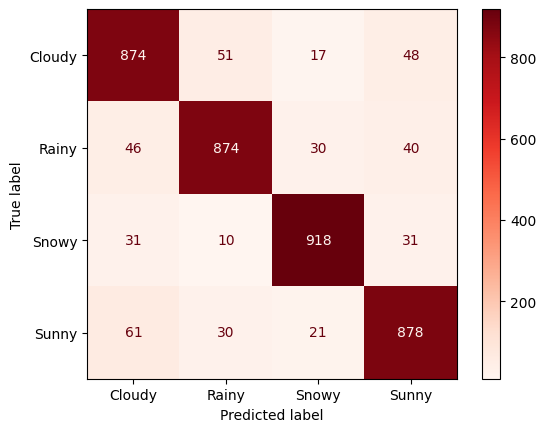

In [286]:
# Cek default performa model terhadap Test-Set
y_pred_test_default = pipe_rf.fit(X_train, y_train).predict(X_test)

print('Accuracy Score - Test Set (Default Model): ', accuracy_score(y_test, y_pred_test_default), '\n')
print('Classification Report (Default Model): \n', classification_report(y_test, y_pred_test_default), '\n')
print('Confusion Matrix (Default Model): \n')
ConfusionMatrixDisplay.from_estimator(pipe_rf, X_test, y_test, cmap='Reds')
plt.show()


* **Diagonal utama:** Menunjukkan ``jumlah prediksi yang benar untuk setiap kelas (Cloudy, Rainy, Snowy, Sunny).`` Semakin besar nilai diagonal, semakin baik kinerja model dalam mengklasifikasikan kelas tersebut

* **Nilai di luar diagonal:** Menunjukkan jumlah kesalahan klasifikasi. Misalnya, nilai 51 pada baris Cloudy, kolom Rainy, berarti ada 51 data yang sebenarnya berlabel Cloudy tetapi diprediksi sebagai Rainy

Accuracy Score - Test Set (Tuned Model):  0.9047979797979798 

Classification Report (Tuned Model): 
               precision    recall  f1-score   support

      Cloudy       0.87      0.90      0.88       990
       Rainy       0.90      0.89      0.89       990
       Snowy       0.93      0.94      0.93       990
       Sunny       0.93      0.89      0.91       990

    accuracy                           0.90      3960
   macro avg       0.91      0.90      0.90      3960
weighted avg       0.91      0.90      0.90      3960
 

Confusion Matrix (Tuned Model): 



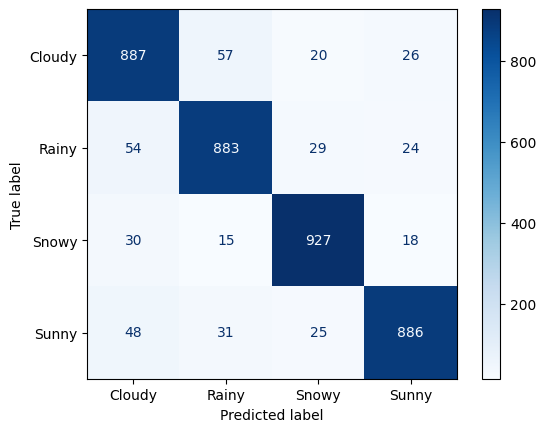

In [287]:
# Cek tuned performa model terhadap Test-Set
y_pred_test_tuned = best_estimator_rf.predict(X_test)

print('Accuracy Score - Test Set (Tuned Model): ', accuracy_score(y_test, y_pred_test_tuned), '\n')
print('Classification Report (Tuned Model): \n', classification_report(y_test, y_pred_test_tuned), '\n')
print('Confusion Matrix (Tuned Model): \n')
ConfusionMatrixDisplay.from_estimator(best_estimator_rf, X_test, y_test, cmap='Blues')
plt.show()


* **Akurasi Tinggi:** ``Model yang ditunjukkan akurasi yang cukup tinggi,`` yang berarti dalam sebagian besar kasus, model berhasil memprediksi cuaca dengan benar

* **Kesalahan :** Kesalahan yang terjadi ``cenderung terkonsentrasi pada kategori cuaca yang serupa,`` seperti Cloudy dan Rainy. Ini menunjukkan bahwa model mungkin kesulitan membedakan antara kondisi cuaca yang mirip

**Kesimpulan:**

* **Akurasi:** Model yang telah disetel ``(tuned) memiliki akurasi yang sedikit lebih tinggi dibandingkan model default.`` Ini menunjukkan bahwa proses tuning berhasil meningkatkan kinerja model

* **Precision, Recall, F1-score:** Secara umum, kedua model ``memiliki nilai precision, recall, dan F1-score yang cukup seimbang untuk setiap kelas.`` Model yang disetel menunjukkan sedikit peningkatan pada beberapa metrik, terutama pada kelas "Sunny"

* **Keseimbangan Kelas:** Dataset tampaknya ``seimbang karena jumlah sampel untuk setiap kelas adalah sama (990).`` Ini bisa menjadi salah satu faktor yang berkontribusi pada kinerja yang baik dari kedua model

In [288]:
# Cek default performa
print('Accuracy - Train (Default Model): ', accuracy_score(y_train, pipe_rf.predict(X_train)))
print('Accuracy - Test  (Default Model): ', accuracy_score(y_test, y_pred_test_default))


Accuracy - Train (Default Model):  1.0
Accuracy - Test  (Default Model):  0.8949494949494949


* **Akurasi pelatihan 100%:** Ini menunjukkan bahwa model dapat memprediksi dengan sempurna pada data pelatihan

* **Akurasi pengujian jauh lebih rendah (89.49%)** dibandingkan dengan akurasi pelatihan. Ini mengindikasikan bahwa model terlalu spesifik untuk data pelatihan dan tidak mampu menggeneralisasi dengan baik ke data baru

In [289]:
# Cek tuned performa
print('Accuracy - Train (Tuned Model): ', accuracy_score(y_train, best_estimator_rf.predict(X_train)))
print('Accuracy - Test  (Tuned Model): ', accuracy_score(y_test, y_pred_test_tuned))

Accuracy - Train (Tuned Model):  0.9832196600627909
Accuracy - Test  (Tuned Model):  0.9047979797979798


* **Akurasi pelatihan turun dari 1.0 menjadi 0.9832:** Ini mengindikasikan bahwa ``model yang ditune kurang overfit`` dibandingkan dengan model default

* **Akurasi pengujian meningkat sedikit dari 0.8949 menjadi 0.9048:** Ini menunjukkan bahwa tuning telah membantu model dalam menggeneralisasi ``lebih baik`` ke data baru


``Tuning model telah memberikan hasil positif``

**Model Default:**

* Akurasi pelatihan 100%: Model dapat memprediksi dengan sempurna pada data pelatihan, tetapi akurasi pada data uji lebih rendah (89.49%). Ini mengindikasikan bahwa ``model terlalu spesifik untuk data pelatihan`` dan tidak mampu menggeneralisasi dengan baik ke data baru

**Model Tuned:**

* Akurasi pelatihan lebih rendah ``(98.32%)`` dibandingkan model default, namun masih sangat tinggi

* Akurasi pengujian meningkat ``(90.48%)`` dibandingkan model default. Ini menunjukkan bahwa proses tuning berhasil mengurangi overfitting

**Tetapi** Kedua model, terutama model default, ``cenderung overfitting,`` artinya mereka terlalu menyesuaikan diri dengan data pelatihan dan tidak dapat memprediksi dengan baik pada data baru

**Asusmsi Saya yang Menyebabkan Overfitting:**

* **Kompleksitas Model:** SVM dengan kernel RBF dan parameter yang dipilih mungkin terlalu kompleks untuk data ini, memungkinkan model untuk terlalu cocok dengan data pelatihan

* **Jumlah Fitur:** Meskipun PCA telah digunakan untuk mengurangi dimensi, kemungkinan masih ada fitur yang menyebabkan model untuk mempelajari noise dalam data pelatihan

Saya sudah melakukan beberapa perubahan seperti meningkatkan regularisasi dalam model SVM, menggunakan model yang lebih sederhana, menerapkan teknik validasi yang lebih ketat, seperti k-fold cross-validation dengan lebih banyak fold, melakukan hyperparameter tuning yang lebih menyeluruh. ``Tetapi saat running memakan waktu yang sangat lama``

## **9. Model Saving**

In [290]:
# Simpan model terbaik ke dalam file
with open('best_model_rf.pkl', 'wb') as file:
    pickle.dump(best_estimator_rf, file)

print("Model terbaik telah disimpan sebagai 'best_model_rf.pkl'")

Model terbaik telah disimpan sebagai 'best_model_rf.pkl'


## **10. Conceptual Problem**

#### **1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !**

**Latar Belakang Bagging:**
Bagging, atau Bootstrap Aggregating, adalah ``teknik ensemble learning yang bertujuan untuk meningkatkan stabilitas dan akurasi model machine learning.`` Teknik ini mengurangi varians dan membantu menghindari overfitting. Bagging dikembangkan sebagai respon terhadap kelemahan dari model tunggal yang rentan terhadap noise dalam data pelatihan

  **Cara Kerja Bagging:**

  * **Bootstrap Sampling:** Mengambil beberapa sampel bootstrap dari dataset asli. Setiap sampel diambil dengan penggantian (resampling), sehingga beberapa data bisa muncul lebih dari sekali dalam satu sampel bootstrap
  * **Model Training:** Melatih model yang sama pada setiap sampel bootstrap secara terpisah
  * **Aggregation:** Menggabungkan hasil prediksi dari semua model. Untuk tugas regresi, rata-rata hasil prediksi digunakan. Untuk tugas klasifikasi, metode voting mayoritas diterapkan

#### **2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !**



**Perbedaan Cara Kerja Algoritma Random Forest dan AdaBoost**

**1. Random Forest:**

``Random Forest adalah algoritma machine learning yang termasuk dalam kategori ensemble learning.`` Ini berarti bahwa ia menggabungkan beberapa model (dalam hal ini, pohon keputusan) untuk membuat prediksi yang lebih akurat

**Bagging Method:** ``Random Forest adalah metode ensemble yang menggunakan teknik bagging.`` Model ini mengkombinasikan beberapa pohon keputusan (decision trees) yang dilatih pada sampel bootstrap dari data asli

**Random Feature Selection:** Pada setiap split dalam pohon keputusan, hanya subset acak dari fitur yang dipertimbangkan untuk mengurangi korelasi antar pohon dan meningkatkan keragaman

**2. Boosting:**

``Boosting adalah teknik dalam machine learning yang bertujuan untuk meningkatkan kinerja model prediksi dengan menggabungkan beberapa model lemah (weak learners) menjadi satu model kuat (strong learner)``

Salah satu boostingnya yaitu :

**AdaBoost:** ``AdaBoost adalah metode ensemble yang menggunakan teknik boosting.`` Model ini mengkombinasikan beberapa model lemah (weak learners), biasanya pohon keputusan berukuran kecil (stump), secara berurutan

**Sequential Learning:** Setiap model lemah dilatih secara berurutan, dan setiap model baru fokus pada kesalahan yang dibuat oleh model sebelumnya

**Weighted Voting:** Setiap model diberi bobot berdasarkan akurasinya, dan hasil prediksi akhir adalah voting berbobot dari semua model

#### **3. Jelaskan apa yang dimaksud dengan Cross Validation !**

**Cross Validation** adalah ``teknik evaluasi model yang digunakan untuk menilai seberapa baik model akan menggeneralisasi ke dataset yang tidak terlihat.`` Teknik ini membagi data menjadi beberapa subset (folds) dan melakukan pelatihan dan pengujian secara berulang-ulang pada subset yang berbeda

**Untuk K-Fold Cross Validation:**

**Pembagian Data:** Data dibagi menjadi K subset (folds) yang kira-kira memiliki ukuran yang sama

**Iterasi Pelatihan dan Pengujian:** Model dilatih pada K-1 subset dan diuji pada subset yang tersisa. Proses ini diulang K kali, setiap kali dengan subset yang berbeda sebagai data uji

**Averaging Results:** Hasil akurasi dari K iterasi dirata-ratakan untuk memberikan estimasi kinerja model


**Penerapan Codenya:**

``skfold = StratifiedKFold(n_splits=5)``

``cv_svm_model = cross_val_score(pipe_svm, X_train, y_train, cv=skfold, scoring="accuracy")``

``print('Accuracy - All - Cross Validation  : ', cv)``<br>
``print('Accuracy - Mean - Cross Validation : ', cv.mean())``<br>
``print('Accuracy - Std - Cross Validation  : ', cv.std())``<br>
``print('Accuracy - Range of Test-Set       : ', (cv.mean() - cv.std()) , '-', (cv.mean() + cv.std()))``

## **11. Conclusion**

1. Memiliki dataset yang ``balance``
2. Kelas-kelas dalam data (misalnya, cerah, mendung, hujan) ``seimbang, maka cocok menggunakan accuracy score``
3. Fitur-fitur yang mempengaruhi targetnya yaitu : ``cloud_cover, season, location, temp, humidity, wind_speed, precipitation_pct, atm_pressure, uv_index, visibility_km``
4. Dengan best model menggunakan ``SVM (mean accuracy: 0.9020229364571541)``
5. Best parameters : ``{'svm__kernel': 'rbf', 'svm__gamma': 0.1, 'svm__degree': 4, 'svm__coef0': 1.0, 'svm__class_weight': None, 'svm__C': 10}``
6. Tuning memberikan ``hasil yang lebih positif``
7. Adanya ``overfitting`` yang sudah saya asumsikan di atas
8. Saya menggunakan ``K-Folds Cross Validation karena data yang digunakan dalam pelatihan model memiliki distribusi yang merata``

**Dari Data Inference :**

**1. Distribusi Prediksi**

* Dari 10 sampel data dummy yang diuji, model terbaik memberikan prediksi sebagai berikut:<br>
``Sunny: 6 kali``<br>
``Cloudy: 2 kali``<br>
``Snowy: 1 kali``<br>
``Rainy: 1 kali``

**2. Dominasi Prediksi**

* ``Prediksi Sunny mendominasi hasil dengan 60% dari total prediksi.`` Ini menunjukkan bahwa model cenderung mengklasifikasikan kondisi cuaca sebagai Sunny lebih sering dibandingkan kategori lainnya dalam sampel ini

**3. Prediksi Beragam**

* ``Meskipun Sunny mendominasi, model juga memberikan prediksi untuk kondisi cuaca lainnya seperti Cloudy, Snowy, dan Rainy.`` Ini menunjukkan bahwa model memiliki kemampuan untuk membedakan berbagai jenis cuaca meskipun dengan proporsi yang berbeda

## **12. Recomendation**

**Rekomendasi untuk Project Prediksi Cuaca ini**

* **Membuat layanan prediksi cuaca**
``Integrasikan model prediksi cuaca ini ke dalam aplikasi atau website yang memberikan informasi cuaca kepada pengguna.`` Misalnya, aplikasi cuaca yang memberikan notifikasi cuaca harian

* **Membantu petani dalam membuat keputusan yang lebih baik seperti penanaman, penyiraman, dan pemanenan**
Sistem manajemen pertanian yang menggunakan prediksi cuaca ``untuk memberi tahu petani tentang waktu terbaik untuk menanam, menyiram, atau memanen tanaman``

* **Mengurangi dampak bencana alam dengan memberikan peringatan dini**
``Sistem peringatan dini yang menggunakan model prediksi cuaca untuk mendeteksi potensi bencana alam seperti badai atau banjir,`` dan memberikan peringatan kepada penduduk di daerah yang berisiko

* **Membantu siapapun untuk merencanakan perjalanan mereka** 
Aplikasi wisata yang memberikan informasi cuaca kepada wisatawan untuk ``membantu mereka merencanakan perjalanan mereka dan memilih waktu terbaik untuk mengunjungi tempat-tempat wisatanya``